In [128]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# About Dataset
## Dataset Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

**Content**
There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

Some ideas for exploration:

How does the probability of default payment vary by categories of different demographic variables?
Which variables are the strongest predictors of default payment?

## General numbers

In [2]:
credit_card_info = pd.read_csv('UCI_Credit_Card.csv')

In [3]:
credit_card_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
credit_card_info.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


There's no missing values in the dataset

In [5]:
credit_card_info.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
y_col = 'default.payment.next.month'

## Funcions

In [7]:
def get_formatted_percentage(serie, n_decimals = 1):
    return (serie*100).apply(lambda x: round(x, n_decimals))

In [8]:
def boxplot_variation(data_df, feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=data_df,showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)


## Analysis per column

### default.payment.next.month 

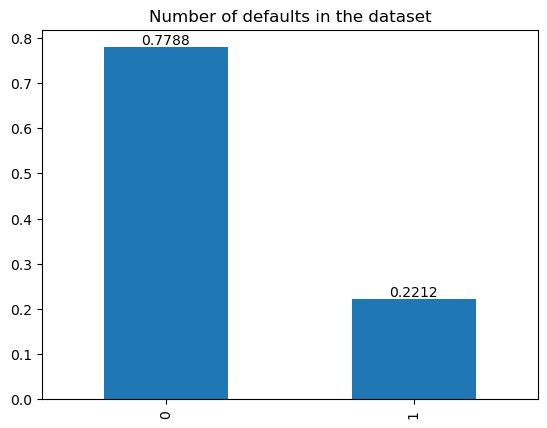

In [9]:
ax = credit_card_info[y_col].value_counts(normalize=True).plot(kind = 'bar')
plt.title('Number of defaults in the dataset')

for i in ax.containers:
    ax.bar_label(i,)

By the chart, we can see that the dataset is unbalanced. ~78% is not default.

### LIMIT_BAL 

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

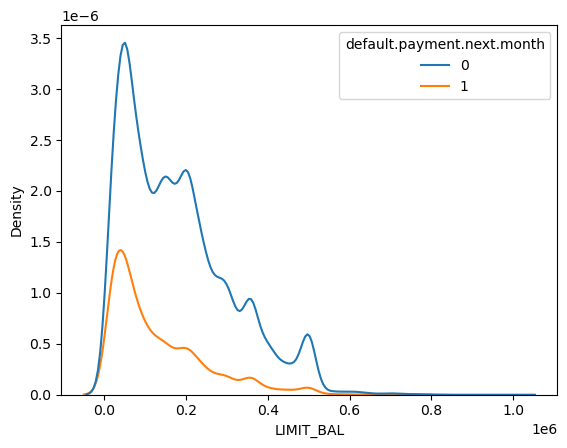

In [10]:
sns.kdeplot(data = credit_card_info, x = 'LIMIT_BAL', hue = y_col)

In [11]:
credit_card_info.groupby(y_col).describe()[['LIMIT_BAL']].reset_index()

default.payment.next.month LIMIT_BAL                                         \
                                 count           mean            std      min   
0                          0   23364.0  178099.726074  131628.359660  10000.0   
1                          1    6636.0  130109.656420  115378.540571  10000.0   

                                           
       25%       50%       75%        max  
0  70000.0  150000.0  250000.0  1000000.0  
1  50000.0   90000.0  200000.0   740000.0

In [12]:
credit_card_info.groupby(y_col).median()[['LIMIT_BAL']].reset_index()

,default.payment.next.month,LIMIT_BAL
0,0,150000.0
1,1,90000.0


<AxesSubplot:xlabel='default.payment.next.month', ylabel='LIMIT_BAL'>

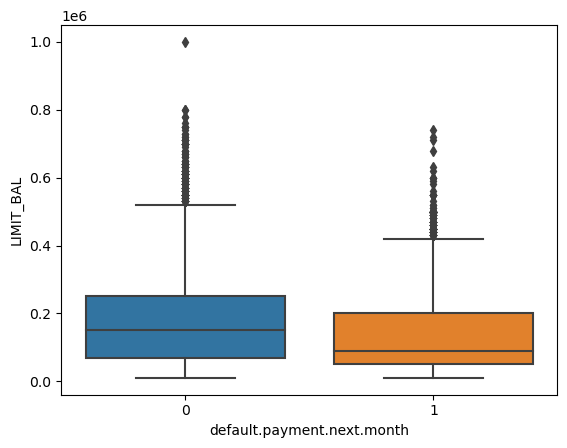

In [13]:
sns.boxplot(data = credit_card_info, y = 'LIMIT_BAL', x = y_col)

The distribution of the credit card limit is similar in both groups, but we can see that default people have a lower limit value.

### SEX 
1=male, 2=female

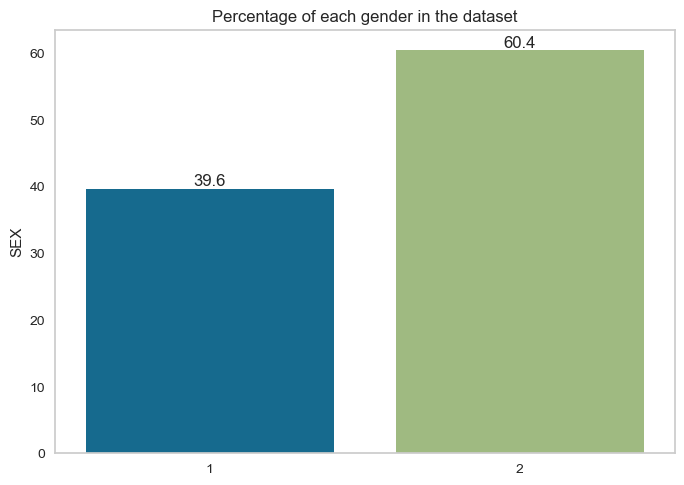

In [260]:
vc_sex = credit_card_info['SEX'].value_counts(normalize=True)
ax = sns.barplot(x = vc_sex.index, y = get_formatted_percentage(vc_sex))
for i in ax.containers:
    ax.bar_label(i,)
    
plt.title('Percentage of each gender in the dataset')
plt.grid(False);

60% of the dataset consists of women

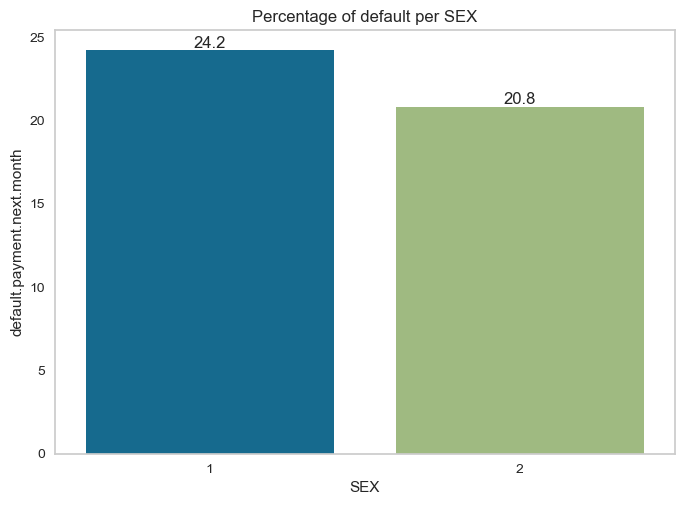

In [262]:
default_per_sex = credit_card_info[['SEX', y_col]].groupby('SEX').mean().reset_index()

ax = sns.barplot(data = default_per_sex, x = 'SEX', y = get_formatted_percentage(default_per_sex[y_col]))
for i in ax.containers:
    ax.bar_label(i,)
    
plt.title('Percentage of default per SEX')
plt.grid(False);

Men are slightly more default then women

In [16]:
credit_card_info[['SEX', 'LIMIT_BAL']].groupby('SEX').describe()

LIMIT_BAL                                                            \
        count           mean            std      min      25%       50%   
SEX                                                                       
1     11888.0  163519.825034  136250.481355  10000.0  50000.0  130000.0   
2     18112.0  170086.462014  125231.777960  10000.0  70000.0  150000.0   

                          
          75%        max  
SEX                       
1    240000.0   800000.0  
2    240000.0  1000000.0

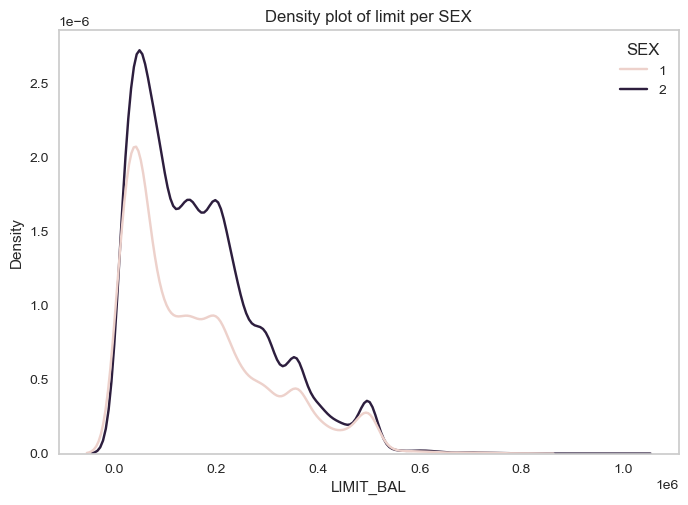

In [263]:
sns.kdeplot(data = credit_card_info, x = 'LIMIT_BAL', hue = 'SEX')
plt.title('Density plot of limit per SEX')
plt.grid(False)

Text(0.5, 1.0, 'Limit distribution per sex')

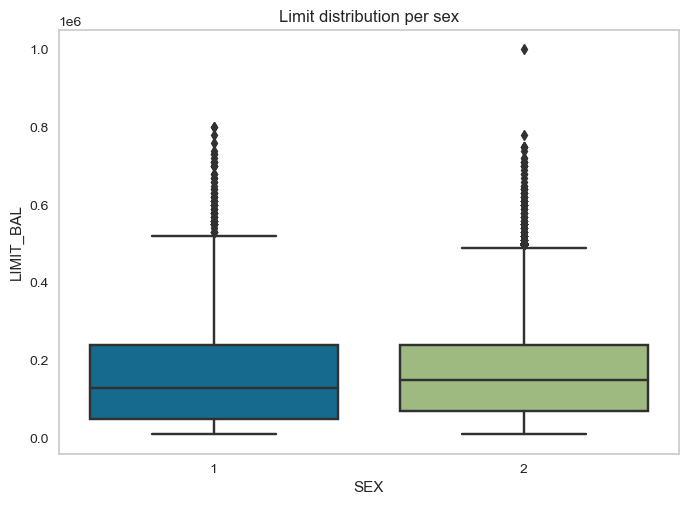

In [264]:
sns.boxplot(data = credit_card_info, y = 'LIMIT_BAL', x = 'SEX')
plt.grid(False)
plt.title('Limit distribution per sex')

### EDUCATION
1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown

In [19]:
credit_card_info['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

We can see that 0 is not in the given list, but its irrelevant to the dataset. As shown below:

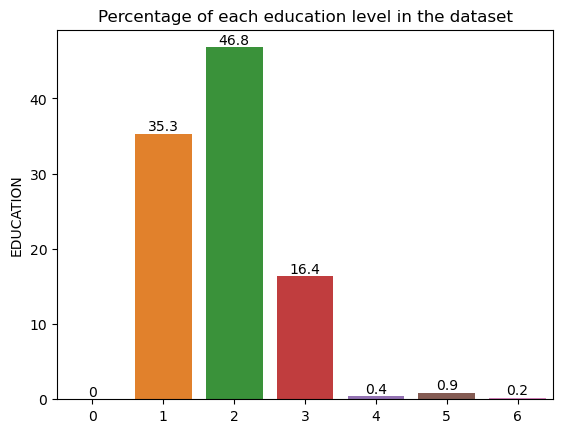

In [20]:
vc_education = credit_card_info['EDUCATION'].value_counts(normalize=True)
ax = sns.barplot(x = vc_education.index, y = get_formatted_percentage(vc_education))
for i in ax.containers:
    ax.bar_label(i,)
    
plt.title('Percentage of each education level in the dataset');

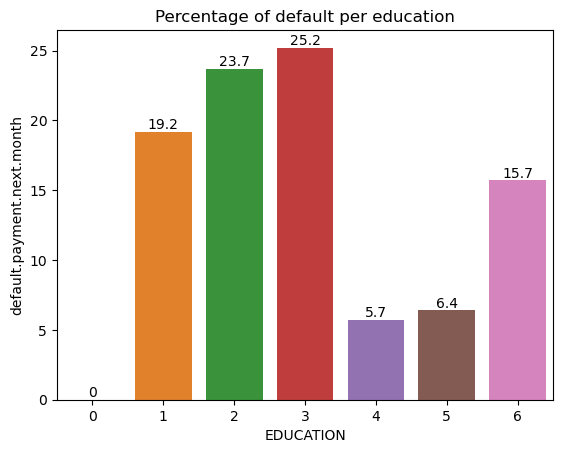

In [21]:
default_per_education = credit_card_info[['EDUCATION', y_col]].groupby('EDUCATION').mean().reset_index()
ax = sns.barplot(x = default_per_education.EDUCATION, y = get_formatted_percentage(default_per_education[y_col]))
for i in ax.containers:
    ax.bar_label(i,)
    
plt.title('Percentage of default per education');

- The default level grows as the educational level goes from 1 to 3
- Seems that levels 4 and 5 of education are different, even if it's not informed the name of the level
- Seems that level 0 has not a single default person

In [22]:
credit_card_info.query("EDUCATION == 0")[y_col].unique()

array([0], dtype=int64)

Yes, there is not

In [23]:
credit_card_info[['EDUCATION', 'LIMIT_BAL']].groupby('EDUCATION').describe()

LIMIT_BAL                                                   \
              count           mean            std      min       25%   
EDUCATION                                                              
0              14.0  217142.857143   86596.195638  50000.0  170000.0   
1           10585.0  212956.069910  135474.936730  10000.0  100000.0   
2           14030.0  147062.437634  120672.282033  10000.0   50000.0   
3            4917.0  126550.270490  113979.322678  10000.0   50000.0   
4             123.0  220894.308943  111531.868048  20000.0  150000.0   
5             280.0  168164.285714  116036.276043  10000.0   80000.0   
6              51.0  148235.294118  131037.489023  10000.0   40000.0   

                                          
                50%       75%        max  
EDUCATION                                 
0          215000.0  265000.0   360000.0  
1          200000.0  300000.0  1000000.0  
2          110000.0  210000.0   800000.0  
3           80000.0  180000.0   760000.0  
4          200000.0  280000.0   710000.0  
5          150000.0  230000.0   550000.0  
6          100000.0  200000.0   540000.0

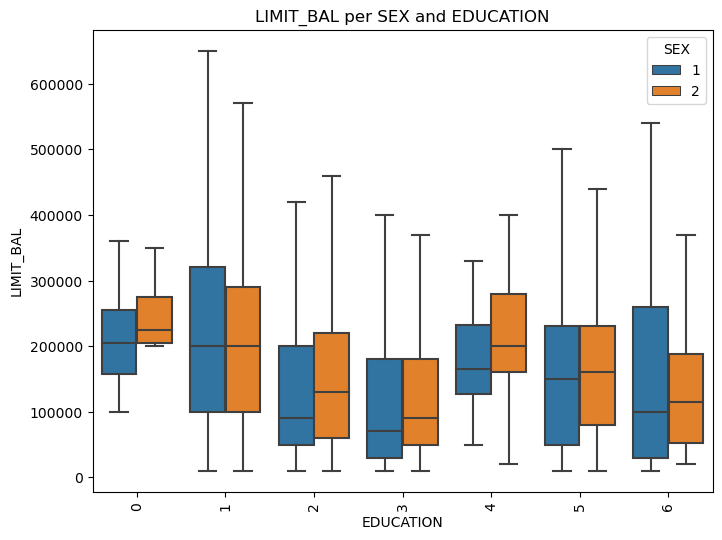

In [24]:
boxplot_variation(data_df=credit_card_info,feature1='EDUCATION',feature2='LIMIT_BAL', feature3='SEX',width=8)
plt.title('LIMIT_BAL per SEX and EDUCATION');

- Level 1 for both men and women preset the highest variability in the dataset 
- Level 1 has the greatest median limit (if we don't count the level 0)

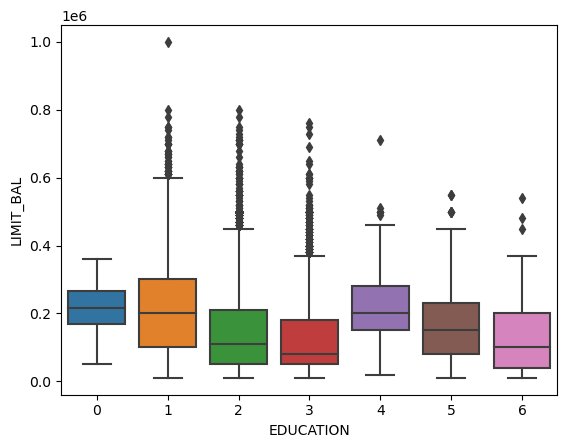

In [25]:
sns.boxplot(data = credit_card_info, y = 'LIMIT_BAL', x = 'EDUCATION');

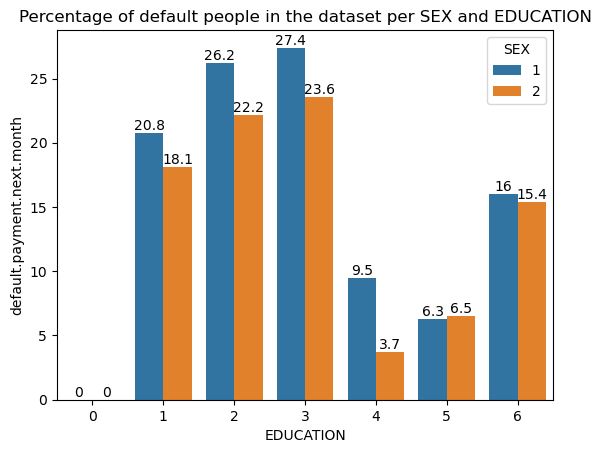

In [26]:
default_per_sex_edu = credit_card_info[['EDUCATION', 'SEX', y_col]].groupby(['EDUCATION', 'SEX']).mean().reset_index()
ax = sns.barplot(data = default_per_sex_edu, x = 'EDUCATION', y = get_formatted_percentage(default_per_sex_edu[y_col]), hue = 'SEX')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.title('Percentage of default people in the dataset per SEX and EDUCATION');

- In general, women are less default then men, except for the level 5


### MARRIAGE: 
1=married, 2=single, 3=others

In [27]:
credit_card_info['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

As EDUCATION, there's a 0

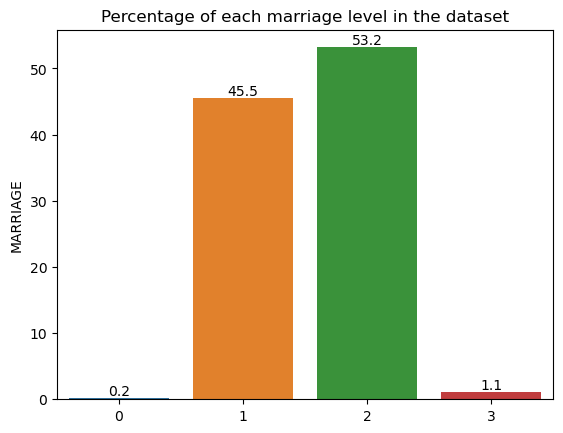

In [28]:
vc_marriage = credit_card_info['MARRIAGE'].value_counts(normalize=True)
ax = sns.barplot(x = vc_marriage.index, y = get_formatted_percentage(vc_marriage))
for i in ax.containers:
    ax.bar_label(i,)
    
plt.title('Percentage of each marriage level in the dataset');

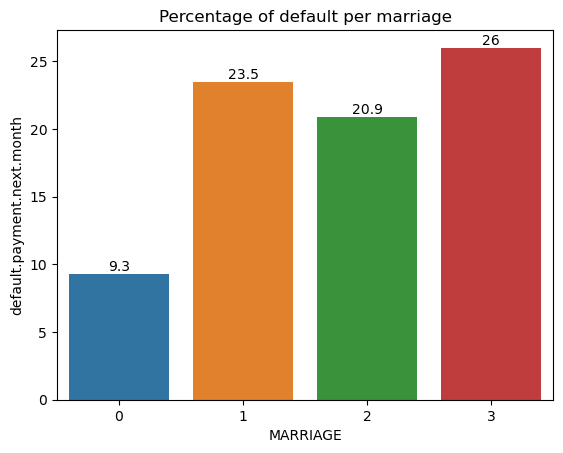

In [29]:
default_per_marriage = credit_card_info[['MARRIAGE', y_col]].groupby('MARRIAGE').mean().reset_index()
ax = sns.barplot(x = default_per_marriage.MARRIAGE, y = get_formatted_percentage(default_per_marriage[y_col]))
for i in ax.containers:
    ax.bar_label(i,)
    
plt.title('Percentage of default per marriage');

- In general, the default percentage is similar between 1,2 and 3. 
- 0 has less default than the others

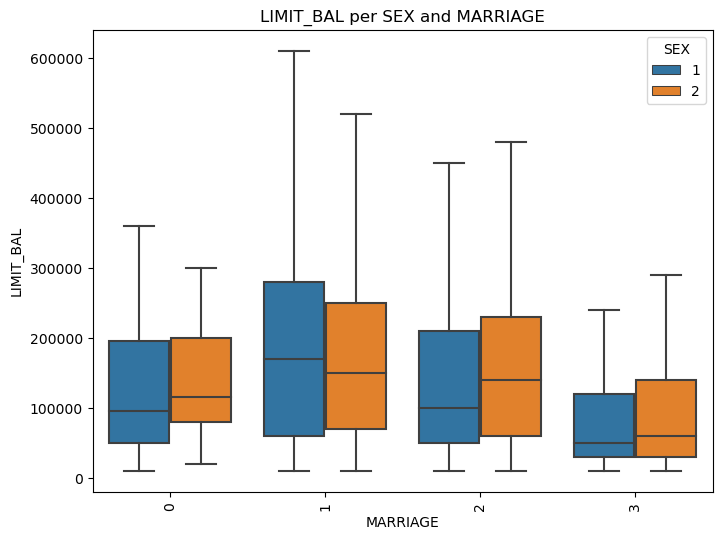

In [30]:
boxplot_variation(data_df=credit_card_info,feature1='MARRIAGE',feature2='LIMIT_BAL', feature3='SEX',width=8)
plt.title('LIMIT_BAL per SEX and MARRIAGE');

- Married people in general have a higher limit and higher variability

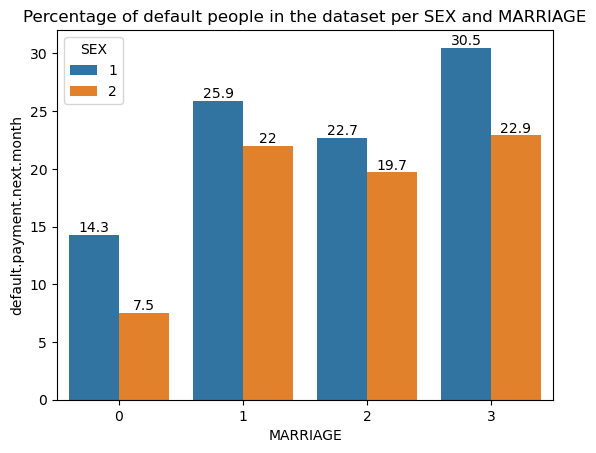

In [31]:
default_per_sex_marr = credit_card_info[['MARRIAGE', 'SEX', y_col]].groupby(['MARRIAGE', 'SEX']).mean().reset_index()
ax = sns.barplot(data = default_per_sex_marr, x = 'MARRIAGE', y = get_formatted_percentage(default_per_sex_marr[y_col]), hue = 'SEX')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.title('Percentage of default people in the dataset per SEX and MARRIAGE');

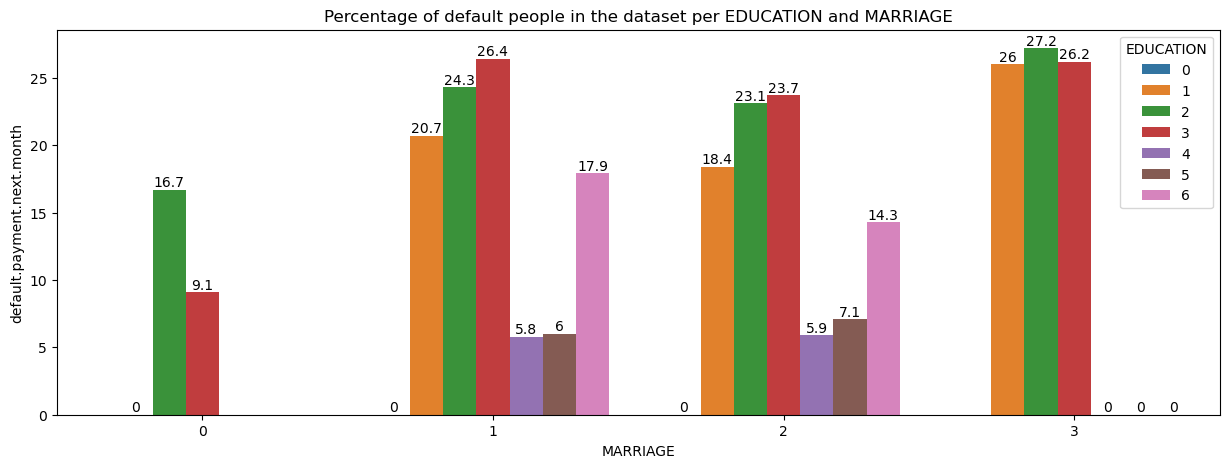

In [32]:
default_per_sex_marr = credit_card_info[['MARRIAGE', 'EDUCATION', y_col]].groupby(['MARRIAGE', 'EDUCATION']).mean().reset_index()
plt.figure(figsize=(15,5))
ax = sns.barplot(data = default_per_sex_marr, x = 'MARRIAGE', y = get_formatted_percentage(default_per_sex_marr[y_col]), hue = 'EDUCATION')

for i in ax.containers:
    ax.bar_label(i,)

    
plt.title('Percentage of default people in the dataset per EDUCATION and MARRIAGE');

### AGE: 

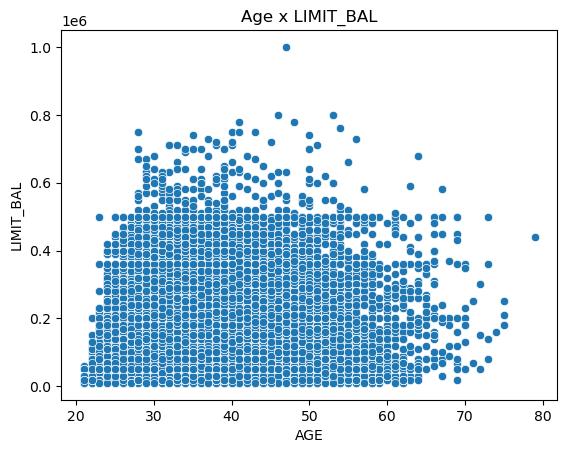

In [33]:
sns.scatterplot(data = credit_card_info, y='LIMIT_BAL', x = 'AGE')
plt.title('Age x LIMIT_BAL');

In [34]:
credit_card_info[['LIMIT_BAL', 'AGE']].corr()

,LIMIT_BAL,AGE
LIMIT_BAL,1.000000,0.144713
AGE,0.144713,1.000000


- In general, theres no correlation (as I expected). 14%

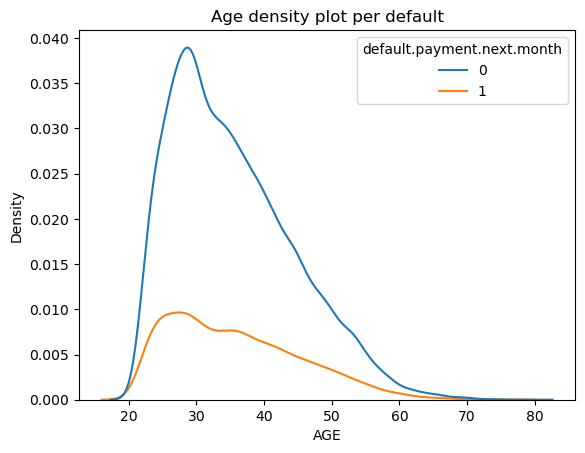

In [35]:
sns.kdeplot(data = credit_card_info, x = 'AGE', hue = y_col)
plt.title('Age density plot per default');

In [36]:
credit_card_info[[y_col, 'AGE']].groupby(y_col).describe()

AGE                                         \
                              count       mean       std   min   25%   50%   
default.payment.next.month                                                   
0                           23364.0  35.417266  9.077355  21.0  28.0  34.0   
1                            6636.0  35.725738  9.693438  21.0  28.0  34.0   

                                        
                             75%   max  
default.payment.next.month              
0                           41.0  79.0  
1                           42.0  75.0

- Seems that there's not much difference between age, seems that both data came from the same distribution


In [37]:
# credit_card_info['age_bin']
credit_card_info['AGE_BIN'] = credit_card_info['AGE'].apply(lambda x : x - (x%10))

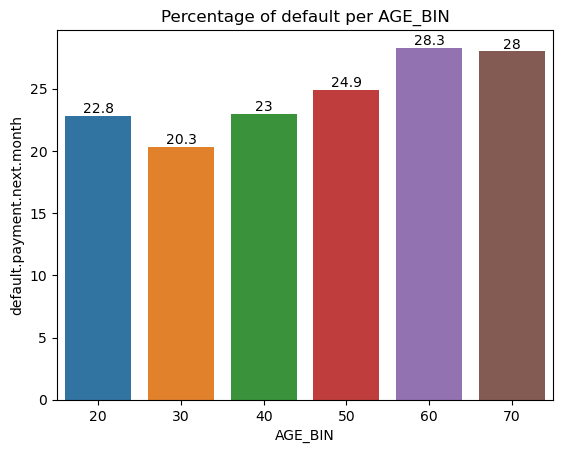

In [38]:
default_per_AGE_BIN = credit_card_info[['AGE_BIN', y_col]].groupby('AGE_BIN').mean().reset_index()
ax = sns.barplot(x = default_per_AGE_BIN.AGE_BIN, y = get_formatted_percentage(default_per_AGE_BIN[y_col]))
for i in ax.containers:
    ax.bar_label(i,)
    
plt.title('Percentage of default per AGE_BIN');

In [39]:
credit_card_info[['AGE_BIN', y_col]].groupby('AGE_BIN').describe().reset_index()


AGE_BIN default.payment.next.month                                          \
                               count      mean       std  min  25%  50%  75%   
0      20                     9618.0  0.228426  0.419840  0.0  0.0  0.0  0.0   
1      30                    11238.0  0.202527  0.401901  0.0  0.0  0.0  0.0   
2      40                     6464.0  0.229734  0.420694  0.0  0.0  0.0  0.0   
3      50                     2341.0  0.248612  0.432301  0.0  0.0  0.0  0.0   
4      60                      314.0  0.283439  0.451387  0.0  0.0  0.0  1.0   
5      70                       25.0  0.280000  0.458258  0.0  0.0  0.0  1.0   

        
   max  
0  1.0  
1  1.0  
2  1.0  
3  1.0  
4  1.0  
5  1.0

- As expected, the percentage of default doesn't vary much with AGE_BIN

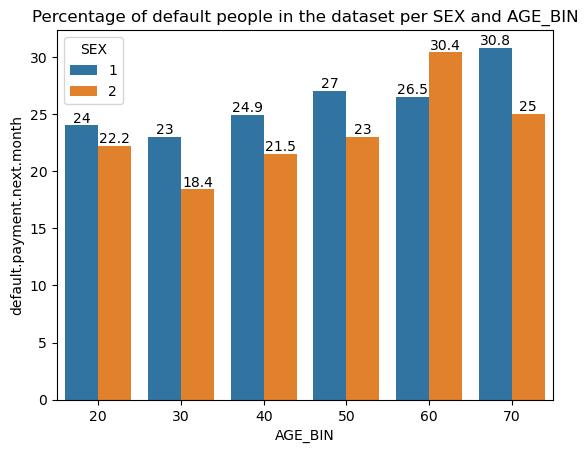

In [40]:
default_per_sex_age = credit_card_info[['AGE_BIN', 'SEX', y_col]].groupby(['AGE_BIN', 'SEX']).mean().reset_index()
ax = sns.barplot(data = default_per_sex_age, x = 'AGE_BIN', y = get_formatted_percentage(default_per_sex_age[y_col]), hue = 'SEX')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.title('Percentage of default people in the dataset per SEX and AGE_BIN');

### PAY_X: 
Repayment status in X, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

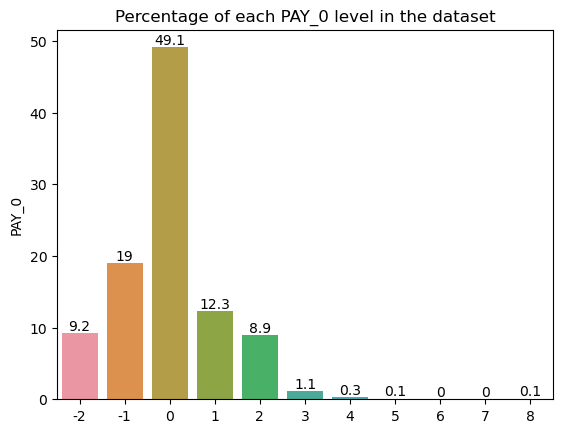

In [41]:
vc_PAY_0 = credit_card_info['PAY_0'].value_counts(normalize=True)
ax = sns.barplot(x = vc_PAY_0.index, y = get_formatted_percentage(vc_PAY_0))
for i in ax.containers:
    ax.bar_label(i,)
    
plt.title('Percentage of each PAY_0 level in the dataset');

- There's no documentation for -2 and 0, but let's see how these levels default

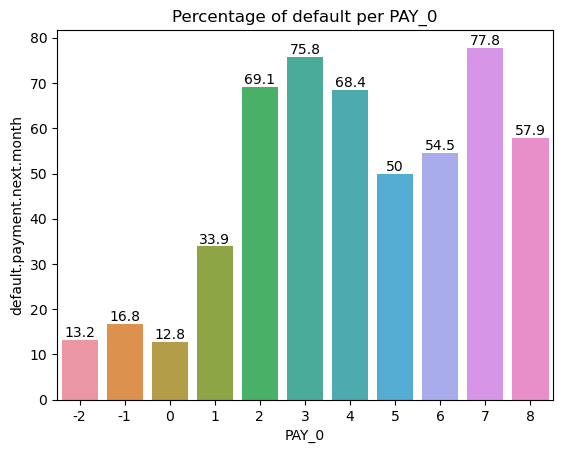

In [42]:
default_per_PAY_0 = credit_card_info[['PAY_0', y_col]].groupby('PAY_0').mean().reset_index()
ax = sns.barplot(x = default_per_PAY_0.PAY_0, y = get_formatted_percentage(default_per_PAY_0[y_col]))
for i in ax.containers:
    ax.bar_label(i,)
    
plt.title('Percentage of default per PAY_0');

- That's the best variable so far, it really looks like that we have a real difference: if a person had already delayed the payment, he will delay again.
- Let's see how people who delayed prior months behave with the current month

In [43]:
pay_cols = [i for i in credit_card_info.columns if (i.startswith('PAY_')) and not ('AMT' in i)]

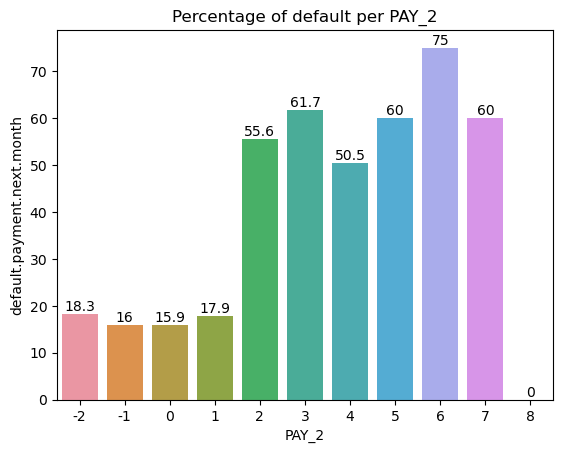

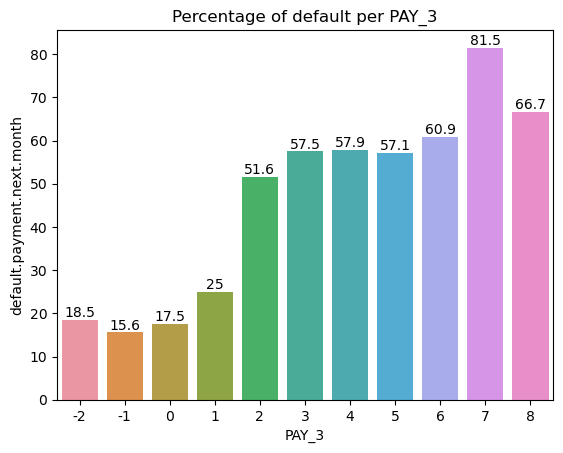

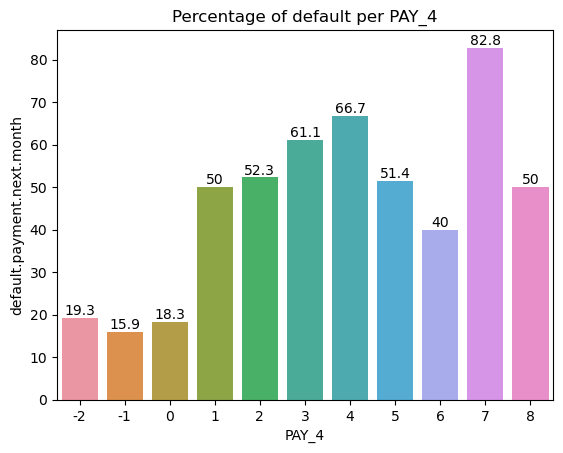

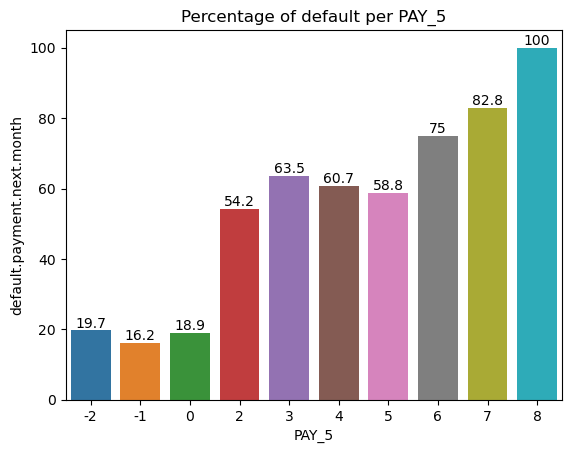

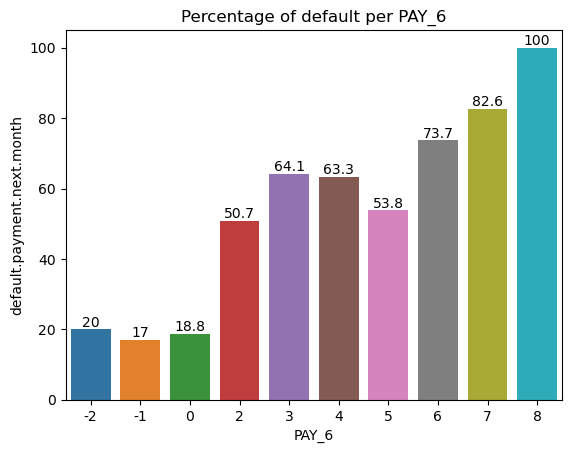

In [44]:
for col in pay_cols[1:]:
    default_per_PAY_X = credit_card_info[[col, y_col]].groupby(col).mean().reset_index()
    ax = sns.barplot(x = default_per_PAY_X[col], y = get_formatted_percentage(default_per_PAY_X[y_col]))
    for i in ax.containers:
        ax.bar_label(i,)

    plt.title('Percentage of default per ' + col)
    plt.show()
    

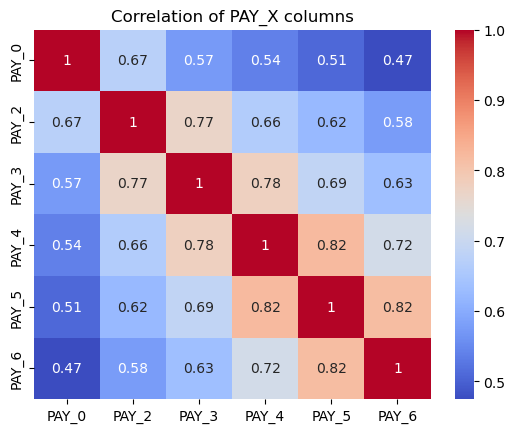

In [45]:
sns.heatmap(credit_card_info[pay_cols].corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation of PAY_X columns')
plt.show()

- Looks like that if a person delays a month, he will delay again next month

### BILL_AMTX: 
Amount of bill statement in X, 2005 (NT dollar)

In [46]:
bill_cols = [i for i in credit_card_info.columns if (i.startswith('BILL'))]


<AxesSubplot:xlabel='BILL_AMT1', ylabel='Density'>

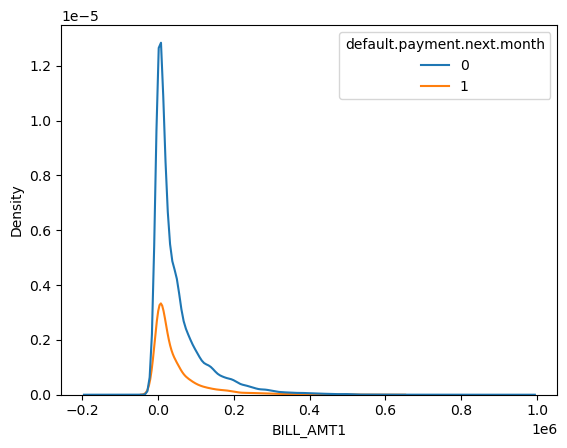

In [47]:
# sns.kdeplot(credit_card_info, x = 'BILL_AMT1')
sns.kdeplot(data = credit_card_info, x = 'BILL_AMT1', hue = y_col)

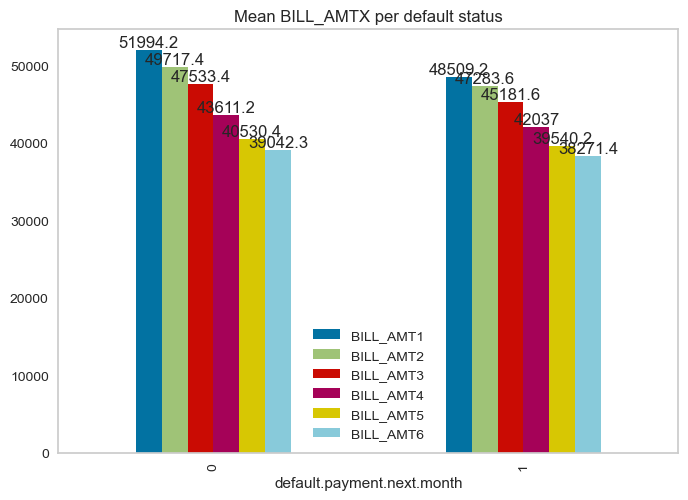

In [277]:
ax = credit_card_info[[y_col] + bill_cols].groupby(y_col).mean().plot(kind= 'bar')

plt.title('Mean BILL_AMTX per default status')
plt.grid(False)
for i in ax.containers:
    ax.bar_label(i,)

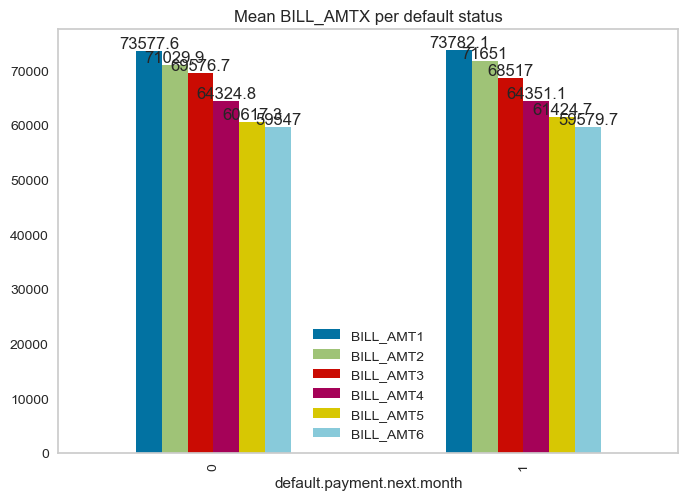

In [278]:
ax = credit_card_info[[y_col] + bill_cols].groupby(y_col).std().plot(kind= 'bar')

plt.title('Mean BILL_AMTX per default status')
plt.grid(False)
for i in ax.containers:
    ax.bar_label(i,)

In [48]:
for col in bill_cols:
    print(col)
    display(credit_card_info[[col, y_col]].groupby(y_col).describe().reset_index())

BILL_AMT1


default.payment.next.month BILL_AMT1                                        \
                                 count          mean           std       min   
0                          0   23364.0  51994.227273  73577.606694 -165580.0   
1                          1    6636.0  48509.162297  73782.067220   -6676.0   

                                        
       25%      50%      75%       max  
0  3677.25  23119.5  69027.0  964511.0  
1  2987.75  20185.0  59626.5  613860.0

BILL_AMT2


default.payment.next.month BILL_AMT2                                       \
                                 count          mean           std      min   
0                          0   23364.0  49717.435670  71029.946709 -69777.0   
1                          1    6636.0  47283.617842  71651.030364 -17710.0   

                                        
      25%      50%       75%       max  
0  3055.0  21660.5  65686.00  983931.0  
1  2694.0  20300.5  57919.75  581775.0

BILL_AMT3


default.payment.next.month BILL_AMT3                                        \
                                 count          mean           std       min   
0                          0   23364.0  47533.365605  69576.661008 -157264.0   
1                          1    6636.0  45181.598855  68516.975738  -61506.0   

                                          
       25%      50%       75%        max  
0  2769.75  20202.5  61894.00  1664089.0  
1  2500.00  19834.5  54733.75   578971.0

BILL_AMT4


default.payment.next.month BILL_AMT4                                        \
                                 count          mean           std       min   
0                          0   23364.0  43611.165254  64324.796730 -170000.0   
1                          1    6636.0  42036.950573  64351.076092  -65167.0   

                                        
      25%      50%       75%       max  
0  2360.0  19000.0  55988.00  891586.0  
1  2141.5  19119.5  50175.75  548020.0

BILL_AMT5


default.payment.next.month BILL_AMT5                                       \
                                 count          mean           std      min   
0                          0   23364.0  40530.445343  60617.268112 -81334.0   
1                          1    6636.0  39540.190476  61424.695949 -53007.0   

                                         
       25%      50%       75%       max  
0  1823.00  17998.0  51135.25  927171.0  
1  1502.75  18478.5  47853.00  547880.0

BILL_AMT6


default.payment.next.month BILL_AMT6                                        \
                                 count          mean           std       min   
0                          0   23364.0  39042.268704  59547.015717 -209051.0   
1                          1    6636.0  38271.435503  59579.674268 -339603.0   

                                       
      25%      50%      75%       max  
0  1265.5  16679.0  49842.5  961664.0  
1  1150.0  18028.5  47424.0  514975.0

- It seems that these columns do not differentiate among the defaults or not

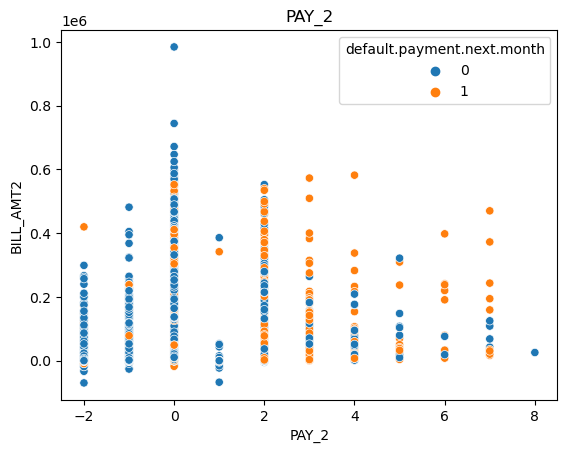

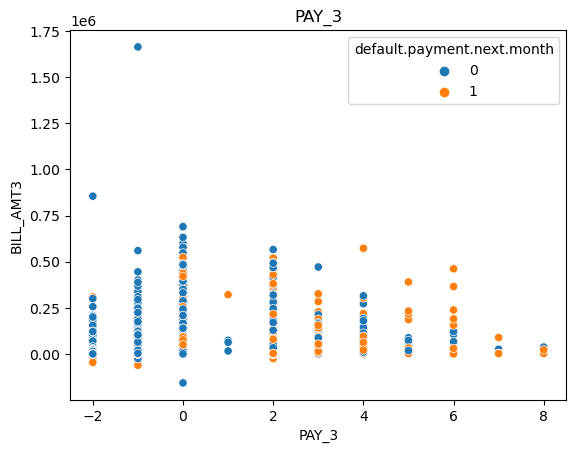

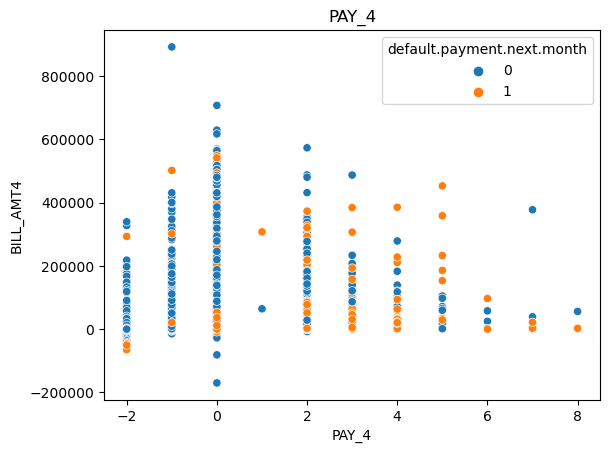

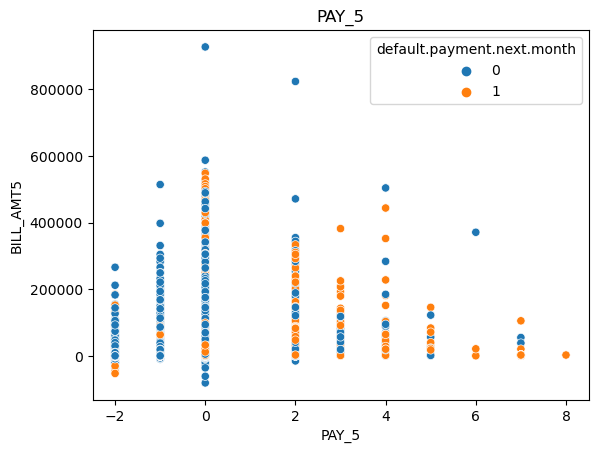

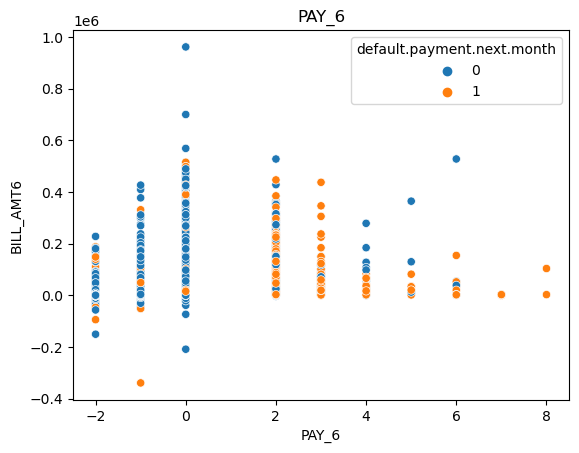

In [49]:
for col in pay_cols[1:]:    
    sns.scatterplot(data = credit_card_info, x = col, y = 'BILL_AMT' + col[-1], hue = y_col)
    plt.title(col)
    plt.show()

- Shouldn't be 0 the BILL_AMTX if the PAY_X is 0 ?

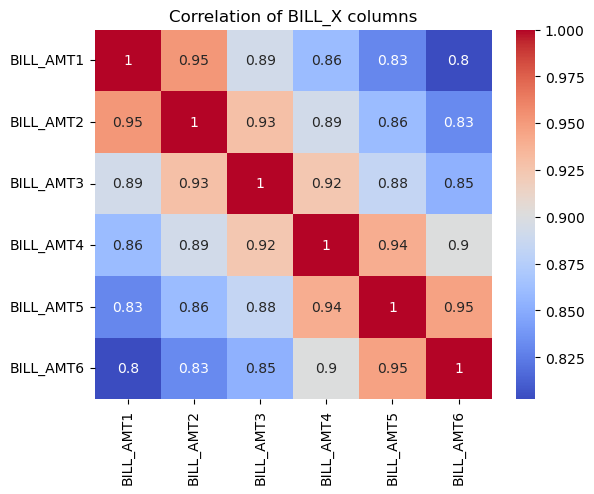

In [50]:
sns.heatmap(credit_card_info[bill_cols].corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation of BILL_X columns')
plt.show()

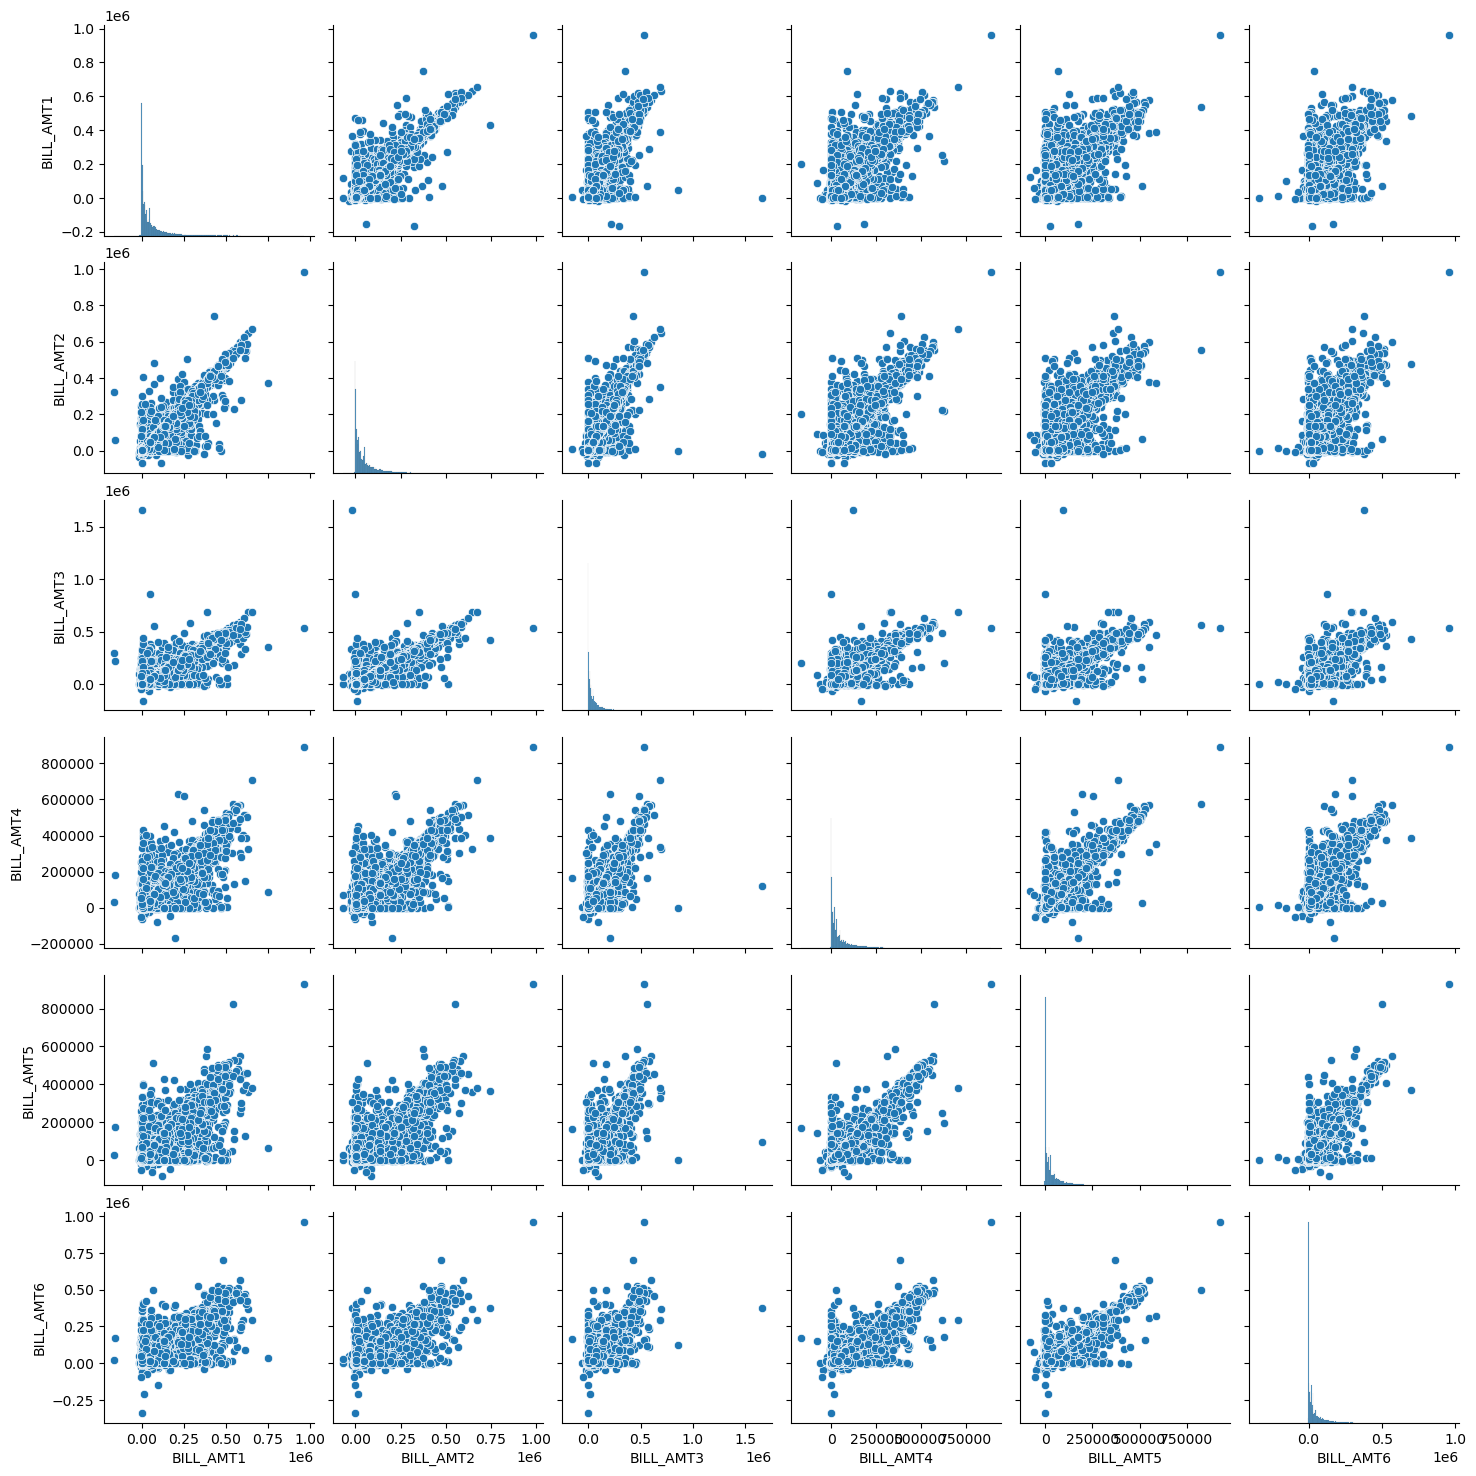

In [51]:
sns.pairplot(credit_card_info[bill_cols])

### PAY_AMTX:
Amount of previous payment in X, 2005 (NT dollar): 


In [52]:
pay_amtx_cols = [i for i in credit_card_info.columns if (i.startswith('PAY_AMT'))]
pay_amtx_cols

['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

(-50000.0, 25000.0)

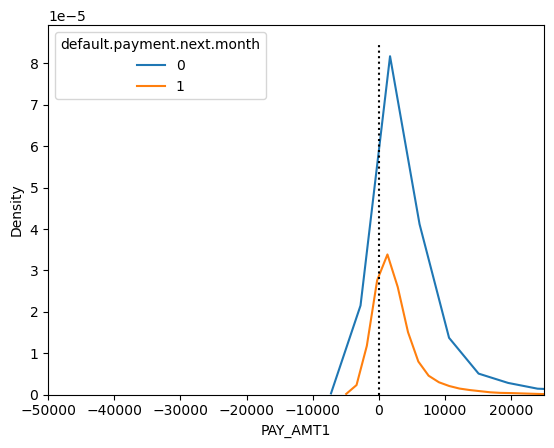

In [53]:
ax = sns.kdeplot(data = credit_card_info, x = 'PAY_AMT1', hue = y_col)
ax.vlines(x= 0, ymin=0, ymax=8.5e-5, color = 'black', linestyles=':')
plt.xlim([-50000,25000])

In [54]:
for col in pay_amtx_cols:
    print(col)
    display(credit_card_info[[col, y_col]].groupby(y_col).describe().reset_index())

PAY_AMT1


default.payment.next.month PAY_AMT1                                  \
                                count         mean           std  min   
0                          0  23364.0  6307.337357  18014.508990  0.0   
1                          1   6636.0  3397.044153   9544.252427  0.0   

                                       
       25%     50%      75%       max  
0  1163.75  2459.5  5606.25  873552.0  
1     0.00  1636.0  3478.25  300000.0

PAY_AMT2


default.payment.next.month PAY_AMT2                                          \
                                count         mean           std  min     25%   
0                          0  23364.0  6640.465074  25302.263601  0.0  1005.0   
1                          1   6636.0  3388.649638  11737.986064  0.0     0.0   

                               
      50%      75%        max  
0  2247.5  5311.25  1684259.0  
1  1533.5  3309.75   358689.0

PAY_AMT3


default.payment.next.month PAY_AMT3                                         \
                                count         mean           std  min    25%   
0                          0  23364.0  5753.496833  18684.255937  0.0  600.0   
1                          1   6636.0  3367.351567  12959.624486  0.0    0.0   

                             
      50%     75%       max  
0  2000.0  5000.0  896040.0  
1  1222.0  3000.0  508229.0

PAY_AMT4


default.payment.next.month PAY_AMT4                                         \
                                count         mean           std  min    25%   
0                          0  23364.0  5300.529319  16689.778060  0.0  390.0   
1                          1   6636.0  3155.626733  11191.973162  0.0    0.0   

                              
      50%      75%       max  
0  1734.0  4602.00  621000.0  
1  1000.0  2939.25  432130.0

PAY_AMT5


default.payment.next.month PAY_AMT5                                         \
                                count         mean           std  min    25%   
0                          0  23364.0  5248.220296  16071.667860  0.0  369.0   
1                          1   6636.0  3219.139542  11944.731175  0.0    0.0   

                             
      50%     75%       max  
0  1765.0  4600.0  426529.0  
1  1000.0  3000.0  332000.0

PAY_AMT6


default.payment.next.month PAY_AMT6                                         \
                                count         mean           std  min    25%   
0                          0  23364.0  5719.371769  18792.950473  0.0  300.0   
1                          1   6636.0  3441.482068  13464.005894  0.0    0.0   

                             
      50%     75%       max  
0  1706.0  4545.0  528666.0  
1  1000.0  2974.5  345293.0

It seems that these columns differentiate among the defaults

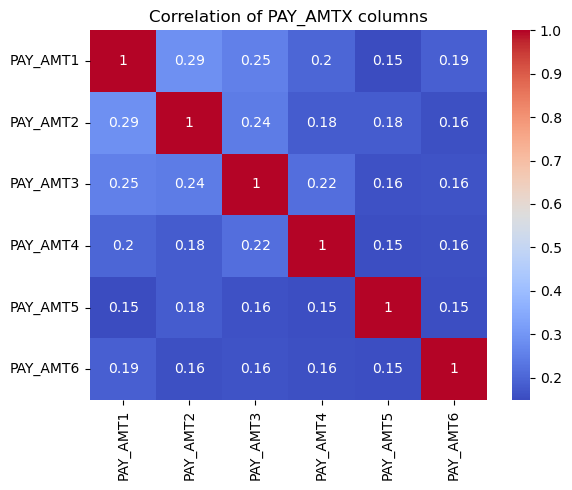

In [55]:
sns.heatmap(credit_card_info[pay_amtx_cols].corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation of PAY_AMTX columns')
plt.show()

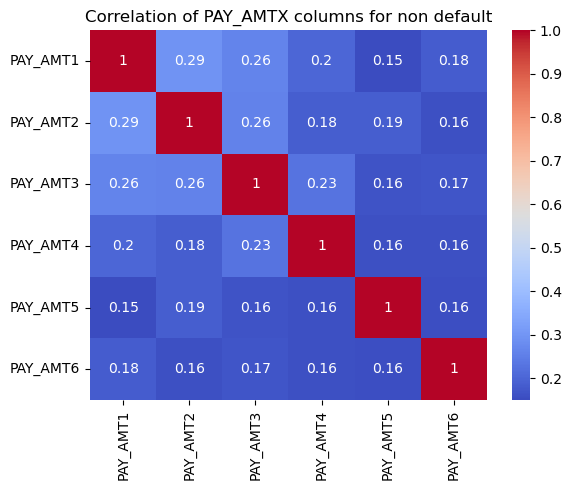

In [56]:
sns.heatmap(credit_card_info.loc[credit_card_info[y_col] == 0][pay_amtx_cols].corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation of PAY_AMTX columns for non default')
plt.show()

Columns PAY_AMTX does not have a high correlation, which is against intuitive, including those that are not default

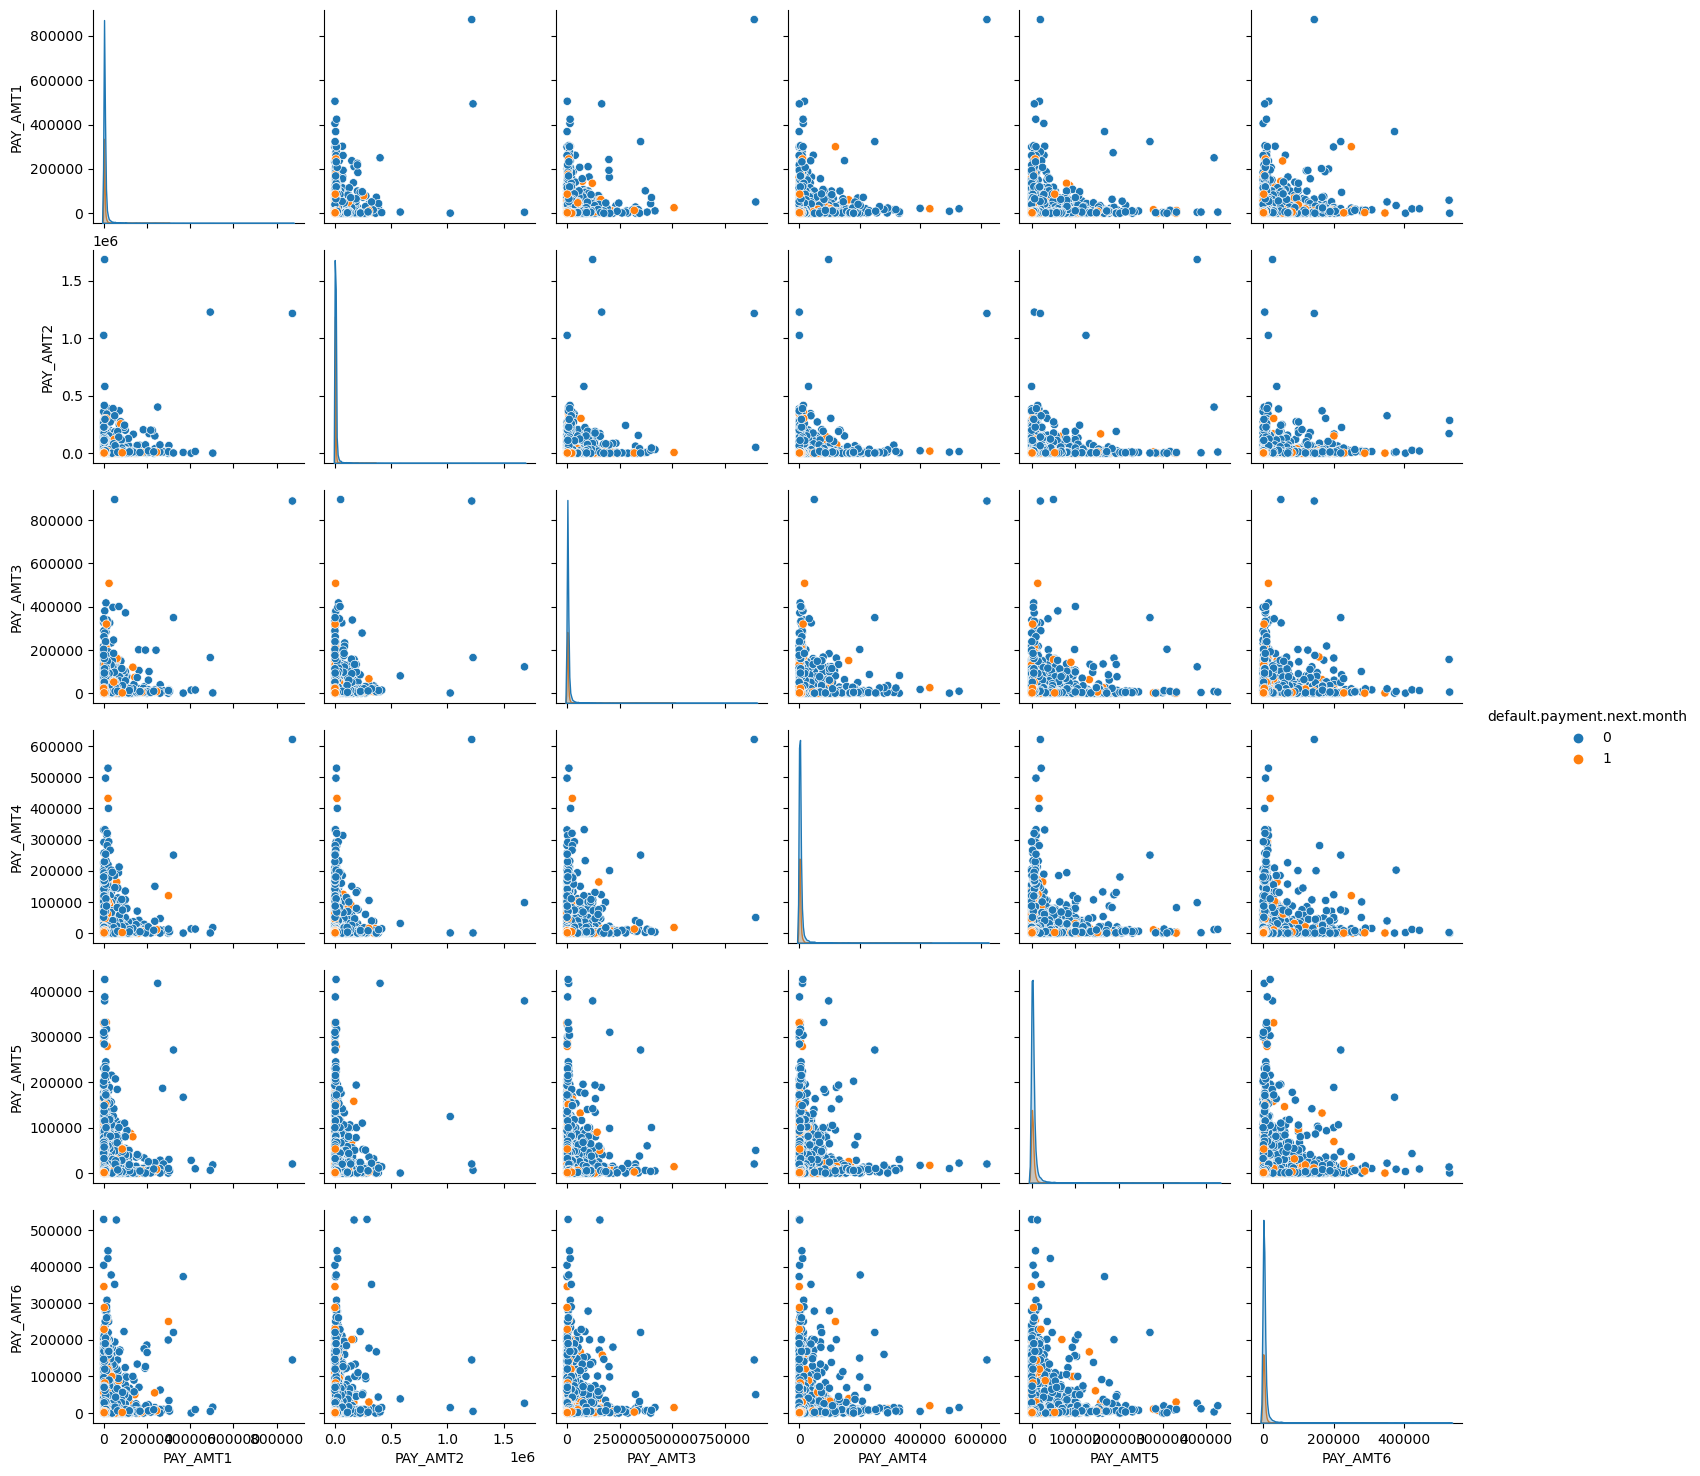

In [57]:
sns.pairplot(credit_card_info[pay_amtx_cols + [y_col]], hue = y_col)

### Summary:
- The dataset is unbalanced
- Sex, education and marriage seems to be important
- Age and past bills do not seem to be important
- Past delays seem to be the most important features
- Past payments seem to be important

## Default Prediction:

### Test 1:
 - Using all data

In [82]:
import pycaret
from pycaret.classification import compare_models, setup, tune_model

In [117]:
classifier1_setup = setup(
    data = credit_card_info.drop(['ID', 'AGE_BIN'], axis = 1), 
    target = y_col,
    normalize= True
)

,Description,Value
0,Session id,6185
1,Target,default.payment.next.month
2,Target type,Binary
3,Original data shape,"(30000, 24)"
4,Transformed data shape,"(30000, 24)"
5,Transformed train set shape,"(21000, 24)"
6,Transformed test set shape,"(9000, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


In [118]:
models_1 = compare_models(n_select=20)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8185,0.7794,0.3572,0.6685,0.4650,0.3678,0.3943,2.1540
lightgbm,Light Gradient Boosting Machine,0.8172,0.7762,0.3619,0.6586,0.4666,0.3675,0.3917,0.2620
ada,Ada Boost Classifier,0.8154,0.7722,0.3152,0.6785,0.4297,0.3369,0.3725,0.5060
rf,Random Forest Classifier,0.8112,0.7577,0.3555,0.6304,0.4541,0.3507,0.3719,1.2620
xgboost,Extreme Gradient Boosting,0.8099,0.7598,0.3531,0.6249,0.4508,0.3465,0.3674,1.4890
lda,Linear Discriminant Analysis,0.8094,0.7167,0.2459,0.6975,0.3631,0.2801,0.3333,0.0590
lr,Logistic Regression,0.8081,0.7230,0.2286,0.7059,0.3450,0.2655,0.3241,0.0950
et,Extra Trees Classifier,0.8066,0.7525,0.3585,0.6065,0.4502,0.3423,0.3599,0.6720
ridge,Ridge Classifier,0.7983,0.0000,0.1399,0.7353,0.2347,0.1762,0.2588,0.0400
svm,SVM - Linear Kernel,0.7952,0.0000,0.1624,0.6558,0.2303,0.1740,0.2173,0.0870


 - In our first attempt, we had the algorithm with best accuracy was gradient boost, but Recall and Precision were low

In [119]:
tuned_model1 = tune_model(models_1[0], search_algorithm='random', n_iter=15, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8236,0.7810,0.3918,0.6741,0.4956,0.3976,0.4191
1,0.8193,0.7785,0.3821,0.6574,0.4833,0.3830,0.4037
2,0.8105,0.7586,0.3272,0.6400,0.4330,0.3333,0.3603
3,0.8233,0.7950,0.3638,0.6912,0.4767,0.3825,0.4111
4,0.8169,0.7879,0.3584,0.6581,0.4641,0.3651,0.3896
Mean,0.8187,0.7802,0.3647,0.6642,0.4706,0.3723,0.3968
Std,0.0048,0.0122,0.0223,0.0173,0.0213,0.0221,0.0206


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [289]:
def plot_feature_importance(names, importance):
    feat_imp = pd.DataFrame()
    feat_imp['importance'] = importance
    feat_imp['names'] = names
    
    feat_imp.sort_values(by = 'importance', ascending=False, inplace = True)
    
    sns.barplot(data = feat_imp, x = 'importance', y = 'names', color='tomato')
    plt.title('Feature importance')

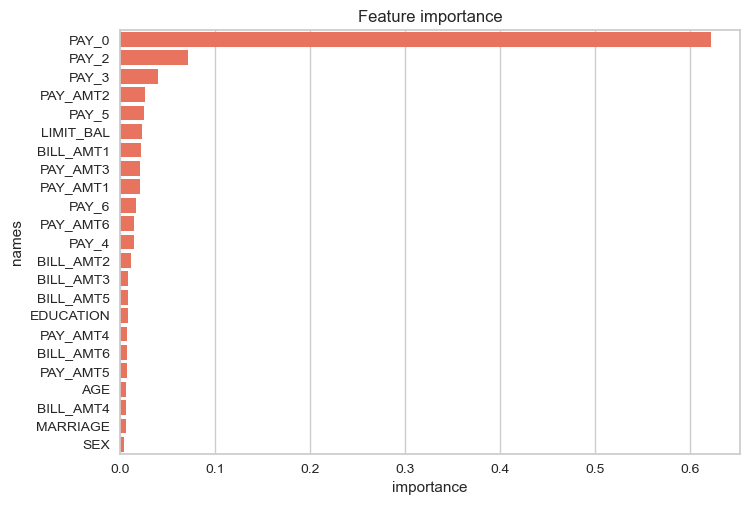

In [290]:
plot_feature_importance(names = tuned_model1.feature_names_in_, importance = tuned_model1.feature_importances_)

 - As expected the values of importance show that the BILL variables are not important, the PAY_X are the most important
 - The PAY_X variables are very correlated, we can drop all and let only PAY_0

### Test 2:
 - Dropping all BILL_AMTX columns 
 - Letting only PAY_0 and PAY_AMT0 in the dataset

In [279]:
classifier2_setup = setup(
    data = credit_card_info.drop(pay_amtx_cols[1:] + pay_cols[1:] + bill_cols + ['ID', 'AGE_BIN'], axis = 1), 
    target = y_col,
    normalize= True
)

,Description,Value
0,Session id,7388
1,Target,default.payment.next.month
2,Target type,Binary
3,Original data shape,"(30000, 8)"
4,Transformed data shape,"(30000, 8)"
5,Transformed train set shape,"(21000, 8)"
6,Transformed test set shape,"(9000, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [280]:
models_2 = compare_models(n_select=20)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8216,0.7623,0.3417,0.6988,0.4587,0.3666,0.4005,0.4960
ada,Ada Boost Classifier,0.8215,0.7548,0.3404,0.6990,0.4576,0.3657,0.3998,0.1900
lightgbm,Light Gradient Boosting Machine,0.8206,0.7603,0.3451,0.6896,0.4597,0.3661,0.3978,0.2020
xgboost,Extreme Gradient Boosting,0.8173,0.7506,0.3421,0.6712,0.4530,0.3569,0.3863,0.4810
qda,Quadratic Discriminant Analysis,0.8166,0.7260,0.3617,0.6570,0.4658,0.3662,0.3903,0.0220
lda,Linear Discriminant Analysis,0.8157,0.7159,0.2779,0.7146,0.3998,0.3151,0.3645,0.0250
nb,Naive Bayes,0.8137,0.7283,0.4030,0.6238,0.4889,0.3814,0.3955,0.0230
lr,Logistic Regression,0.8127,0.7192,0.2540,0.7159,0.3747,0.2929,0.3477,3.8970
svm,SVM - Linear Kernel,0.8101,0.0000,0.2435,0.7088,0.3446,0.2715,0.3213,0.0420
rf,Random Forest Classifier,0.7972,0.7120,0.3567,0.5665,0.4376,0.3217,0.3346,0.4900


- Since the two first models had almost the same result, let's keep using GBC

In [284]:
tuned_model2 = tune_model(models_2[0], search_algorithm='random', n_iter=15, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8138,0.7463,0.3229,0.6623,0.4342,0.3382,0.3695
1,0.8252,0.7702,0.3531,0.7115,0.4719,0.3811,0.4148
2,0.8183,0.7613,0.3552,0.6680,0.4638,0.3665,0.3931
3,0.8260,0.7586,0.3541,0.7152,0.4737,0.3834,0.4174
4,0.8240,0.7635,0.3369,0.7179,0.4586,0.3695,0.4073
Mean,0.8215,0.7600,0.3445,0.6950,0.4604,0.3678,0.4004
Std,0.0047,0.0078,0.0127,0.0245,0.0142,0.0161,0.0176


Fitting 5 folds for each of 15 candidates, totalling 75 fits


 - The changes made no difference in the result

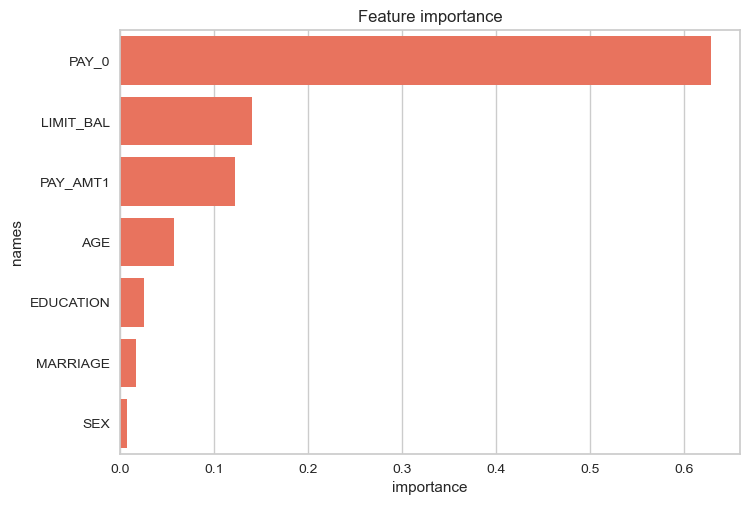

In [291]:
plot_feature_importance(names = tuned_model2.feature_names_in_, importance = tuned_model2.feature_importances_)

- The feature importance looks almost the same

### Test 3:
 - Using all test 2 changes
 - Using techniques to balance the data

In [293]:
classifier3_setup = setup(
    data = credit_card_info.drop(pay_amtx_cols[1:] + pay_cols[1:] + bill_cols + ['ID', 'AGE_BIN'], axis = 1), 
    target = y_col,
    normalize= True,
    fix_imbalance=True,
    fix_imbalance_method='SMOTE'
)

,Description,Value
0,Session id,5722
1,Target,default.payment.next.month
2,Target type,Binary
3,Original data shape,"(30000, 8)"
4,Transformed data shape,"(41710, 8)"
5,Transformed train set shape,"(32710, 8)"
6,Transformed test set shape,"(9000, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [296]:
models_3 = compare_models(n_select=20)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8180,0.7564,0.3649,0.6604,0.4700,0.3710,0.3948,0.1620
gbc,Gradient Boosting Classifier,0.8150,0.7572,0.3836,0.6353,0.4782,0.3740,0.3917,0.7880
xgboost,Extreme Gradient Boosting,0.8143,0.7471,0.3554,0.6462,0.4584,0.3576,0.3810,0.7110
ada,Ada Boost Classifier,0.8083,0.7431,0.4243,0.5952,0.4944,0.3804,0.3892,0.2670
rf,Random Forest Classifier,0.7870,0.7080,0.3636,0.5269,0.4301,0.3045,0.3125,0.5680
dummy,Dummy Classifier,0.7788,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0290
et,Extra Trees Classifier,0.7769,0.6849,0.3688,0.4941,0.4221,0.2875,0.2923,0.5630
knn,K Neighbors Classifier,0.7564,0.6849,0.4366,0.4483,0.4423,0.2865,0.2866,0.1120
svm,SVM - Linear Kernel,0.7115,0.0000,0.5888,0.4063,0.4762,0.2892,0.3010,0.0500
dt,Decision Tree Classifier,0.7079,0.5922,0.3742,0.3502,0.3617,0.1726,0.1728,0.0490


In [126]:
tuned_model3 = tune_model(models_3[1], search_algorithm='random', n_iter=15, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8145,0.7506,0.4004,0.6263,0.4885,0.3819,0.3961
1,0.8186,0.7599,0.3821,0.6538,0.4823,0.3814,0.4016
2,0.8188,0.7536,0.3574,0.6694,0.4660,0.3688,0.3951
3,0.8110,0.7342,0.3445,0.6337,0.4463,0.3441,0.3674
4,0.8069,0.7090,0.3326,0.6180,0.4325,0.3285,0.3515
Mean,0.8140,0.7414,0.3634,0.6402,0.4631,0.3609,0.3823
Std,0.0046,0.0183,0.0248,0.0188,0.0212,0.0212,0.0195


Fitting 5 folds for each of 15 candidates, totalling 75 fits


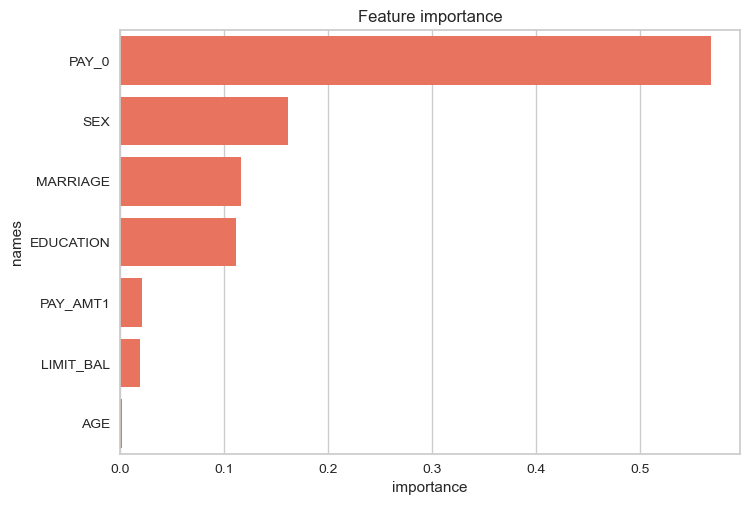

In [300]:
plot_feature_importance(names = tuned_model3.feature_names_in_, importance = tuned_model3.feature_importances_)

### Analyzing the erroros

In [228]:
X_train = classifier3_setup.train_transformed.iloc[:, :-1]
y_train = classifier3_setup.train_transformed.iloc[:, -1]

In [230]:
tuned_model3 = tuned_model3.fit(X = X_train, y = y_train)

In [195]:
X_test_transformed = classifier3_setup.pipeline.transform(classifier3_setup.X_test)
y_test = classifier3_setup.y_test
X_test = classifier3_setup.X_test.copy()


X_test['pred'] = tuned_model3.predict(X_test_transformed)
X_test['proba'] = [i[1] for i in tuned_model3.predict_proba(X_test_transformed).reshape(9000,2)]
X_test['real'] = y_test
X_test['correct'] = X_test.apply(lambda x: 1 if x['pred'] == x['real'] else 0, axis = 1)

In [231]:
X_test.sort_values(by= 'proba')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,pred,proba,real,correct
6876,360000.0,1,0,2,30,0,0,0.019541,0,1
25754,80000.0,2,5,2,33,-2,0,0.021990,0,1
28782,50000.0,2,5,1,32,-2,0,0.022752,0,1
15269,60000.0,2,5,1,30,-2,0,0.023098,0,1
2197,1000000.0,2,1,1,47,0,0,0.023738,0,1
...,...,...,...,...,...,...,...,...,...,...
6127,180000.0,2,2,1,60,2,1,0.914495,1,1
11766,160000.0,2,1,1,69,2,1,0.916937,0,0
11554,150000.0,1,1,1,42,8,1,0.923523,1,1
12966,400000.0,1,2,1,40,7,1,0.944451,1,1


In [245]:
false_positives = X_test.query("pred == 1").query("correct == 0")
true_positives = X_test.query("pred == 1").query("correct == 1")


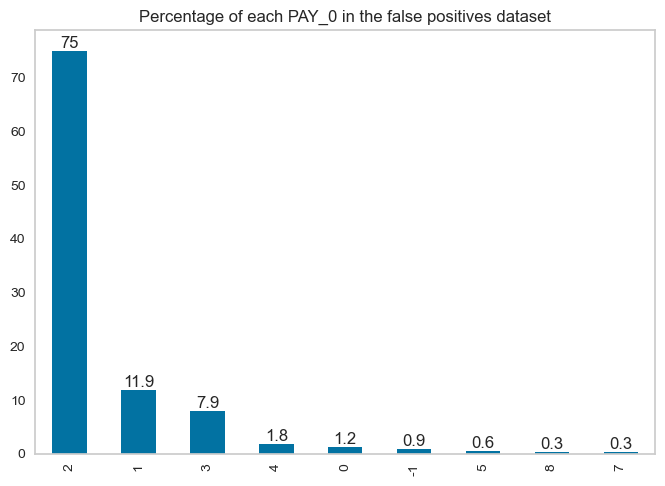

In [233]:
ax = get_formatted_percentage(false_positives.PAY_0.value_counts()/false_positives.shape[0]).plot(kind = 'bar')
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Percentage of each PAY_0 in the false positives dataset')
plt.grid(False)

- Looks like the model is classifying as default if PAY_0 > 0

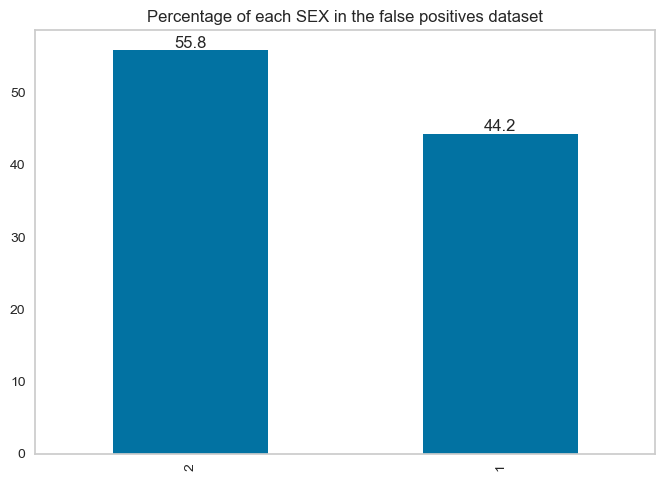

In [234]:
ax = get_formatted_percentage(false_positives.SEX.value_counts()/false_positives.shape[0]).plot(kind = 'bar')
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Percentage of each SEX in the false positives dataset')
plt.grid(False)

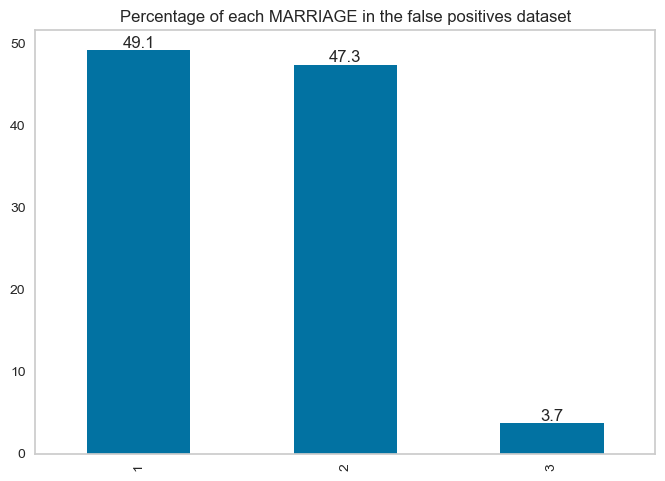

In [235]:
ax = get_formatted_percentage(false_positives.MARRIAGE.value_counts()/false_positives.shape[0]).plot(kind = 'bar')
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Percentage of each MARRIAGE in the false positives dataset')
plt.grid(False)

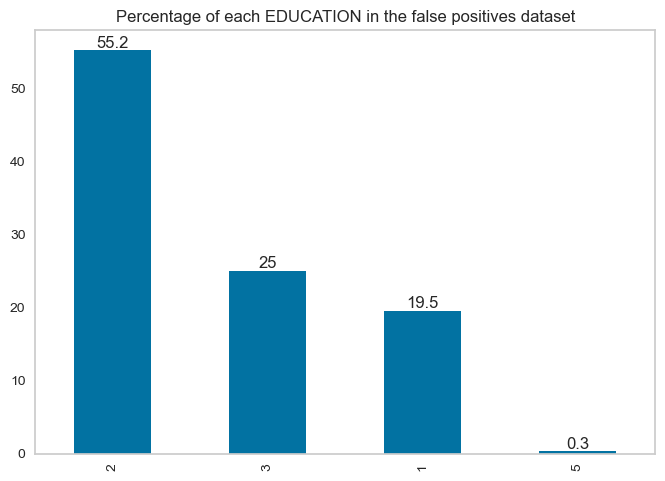

In [236]:
ax = get_formatted_percentage(false_positives.EDUCATION.value_counts()/false_positives.shape[0]).plot(kind = 'bar')
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Percentage of each EDUCATION in the false positives dataset')
plt.grid(False)

In [253]:
display(X_test.query("pred == 1").groupby('correct')[['proba']].describe())
display(X_test.query("pred == 1").groupby('correct')[['LIMIT_BAL']].describe())

proba                                                              \
         count      mean       std       min       25%       50%       75%   
correct                                                                      
0        328.0  0.679899  0.082940  0.501032  0.633339  0.693457  0.736901   
1        698.0  0.703184  0.072656  0.500374  0.662659  0.706629  0.748569   

                   
              max  
correct            
0        0.916937  
1        0.955336

LIMIT_BAL                                                         \
            count          mean           std      min      25%      50%   
correct                                                                    
0           328.0  92286.585938  83405.828125  10000.0  30000.0  60000.0   
1           698.0  99297.992188  93674.703125  10000.0  30000.0  70000.0   

                             
              75%       max  
correct                      
0        130000.0  420000.0  
1        140000.0  600000.0

<AxesSubplot:xlabel='proba', ylabel='Density'>

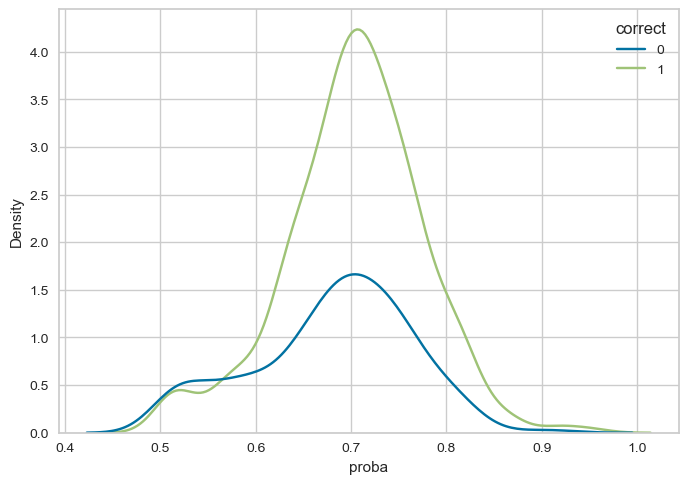

In [248]:
sns.kdeplot(data = X_test.query("pred == 1"), x = 'proba', hue = 'correct')